# DESCRIPTION

In this notebook there is the code to perform the normal mode analysis on the MscS transporter. 

----

## Deformation analysis E. coli transporter

In [1]:
from prody import *
from pylab import *
ion()
from Bio.PDB import PDBParser, PDBIO

In [2]:
closed = parsePDB('ecoli_closed_trim.pdb')
opened = parsePDB('ecoli_open_clean.pdb')

@> 13671 atoms and 1 coordinate set(s) were parsed in 0.12s.
@> 13685 atoms and 1 coordinate set(s) were parsed in 0.11s.


In [3]:
closed_chainA = closed.select('chain A')
opened_chainD = opened.select('chain D')
matches = matchChains(closed_chainA, opened_chainD)
print(matches[0])
defvectot_flat = calcDeformVector(matches[0][0],matches[0][1])

@> Checking AtomGroup ecoli_closed_trim: 1 chains are identified
@> Checking AtomGroup ecoli_open_clean: 1 chains are identified
@> Trying to match chains based on residue numbers and names:
@>   Comparing Chain A from ecoli_closed_trim (len=256) and Chain D from ecoli_open_clean (len=256):
@> 	Match: 256 residues match with 100% sequence identity and 100% overlap.


(<AtomMap: Chain A from ecoli_closed_trim -> Chain D from ecoli_open_clean from ecoli_closed_trim (256 atoms)>, <AtomMap: Chain D from ecoli_open_clean -> Chain A from ecoli_closed_trim from ecoli_open_clean (256 atoms)>, 99.609375, 100.0)


In [4]:
parser = PDBParser(QUIET=True)
structure = parser.get_structure("structure", "ecoli_monomer_closed_trim.pdb")

In [5]:
sq=calcSqFlucts(defvectot_flat.getNormed())

In [6]:
new_b_factors=calcSqFlucts(defvectot_flat)
for i, residue in enumerate(structure.get_residues()):
    if i < len(new_b_factors):
        b_factor_value = new_b_factors[i]
        for atom in residue:
            atom.set_bfactor(b_factor_value)

In [8]:
io = PDBIO()
io.set_structure(structure)
io.save("ecoli_colored_monomer_closed.pdb")

In this way the fluctuations of the monomer can be visualized in pymol using the command: spectrum b

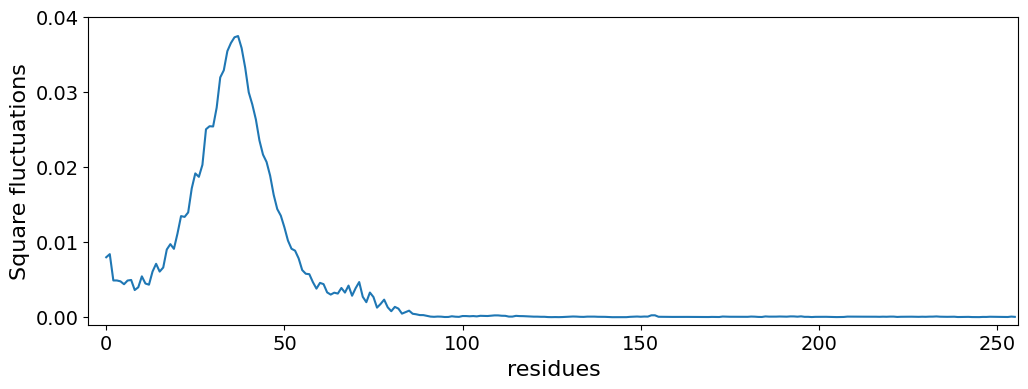

In [10]:
plt.figure(figsize=(12, 4)) 
plt.plot(calcSqFlucts(defvectot_flat.getNormed()))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
plt.ylim(-0.001,0.04)
plt.xlim(-5,256)
plt.ylabel('Square fluctuations', fontsize=16)
plt.xlabel('residues', fontsize=16)
plt.savefig('def.svg', dpi=600, bbox_inches='tight' )

These are the squared fluctuations of the monomer. 

---

## ANM MGA3-MscS in membrane

### Small Membrane Nodes 

In [56]:
from prody import *
from pylab import *
ion()

In [57]:
af3m = parsePDB('AF3_MscS_trim_memb.pdb')  

@> 32490 atoms and 1 coordinate set(s) were parsed in 0.22s.


In [58]:
ca = af3m.select('protein and name CA ')
exanm = exANM('af3m')
exanm.buildMembrane(ca, membrane_high = 20, membrane_low = -20 , hull= False, lat = 'FCC' )

@> Membrane was built in  4s.


array([[-19.537     ,  -4.219     , -12.504     ],
       [-16.477     ,  -3.657     , -10.303     ],
       [-18.551     ,  -1.166     ,  -8.256     ],
       ...,
       [-43.84062043,  61.37686861,  17.53624817],
       [-39.45655839,  65.76093065,  17.53624817],
       [-35.07249635,  70.14499269,  17.53624817]])

In [59]:
a =exanm.getMembrane()

In [60]:
writePDB('memb_fcc_2.pdb', a)

'memb_fcc_2.pdb'

In [61]:
exanm.buildHessian(ca)

@> layers: [0 1 2]
@> max layer: 2
@> layer: 0
@> layer: 1
@> layer: 2
@> layer: 2 finished
@> layer: 1 finished
@> layer: 0 finished
@> Hessian was built in 92.04s.


In [62]:
exanm.calcModes(5)

@> 5 modes were calculated in 12.59s.


In [63]:
writeNMD('af3_ex_fcc_2.5.nmd',exanm,ca.select('protein and name CA'))

'af3_ex_fcc_2.5.nmd'

In [64]:
fluc_memb31 = calcSqFlucts(exanm[0])

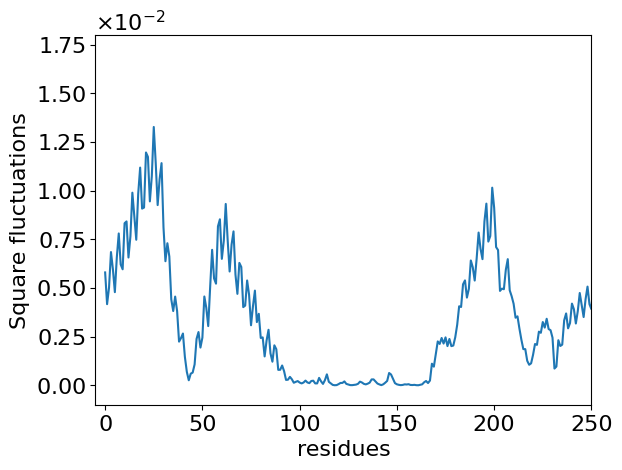

In [65]:
plt.plot(fluc_memb31[:256])
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
ax = plt.gca()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)  
formatter.set_powerlimits((-2, 2))  
ax.yaxis.set_major_formatter(formatter)
plt.ylim(-0.001,0.018)
plt.xlim(-5,250)
plt.ylabel('Square fluctuations', fontsize=16)
plt.xlabel('residues', fontsize=16)
plt.savefig('nm2_small.svg', dpi=600, bbox_inches='tight' )

These are the squared fluctuations of the first normal mode for the first monomer with the starting membrane structure

### Big Membrane Nodes

In [42]:
from prody import *
from pylab import *
ion()

In [43]:
af3m = parsePDB('AF3_MscS_trim_memb.pdb')  

@> 32490 atoms and 1 coordinate set(s) were parsed in 0.29s.


In [44]:
ca = af3m.select('protein and name CA ')
exanm = exANM('af3m')
exanm.buildMembrane(ca, membrane_high = 20, membrane_low = -20 , hull= False, lat = 'FCC', r = 7 )

@> Membrane was built in  1s.


array([[-19.537     ,  -4.219     , -12.504     ],
       [-16.477     ,  -3.657     , -10.303     ],
       [-18.551     ,  -1.166     ,  -8.256     ],
       ...,
       [-49.49747468,  49.49747468,  19.79898987],
       [-39.59797975,  59.39696962,  19.79898987],
       [-29.69848481,  69.29646456,  19.79898987]])

In [45]:
a =exanm.getMembrane()

In [46]:
writePDB('memb_fcc_7.pdb', a)

'memb_fcc_7.pdb'

In [47]:
exanm.buildHessian(ca)

@> layers: [0 1 2]
@> max layer: 2
@> layer: 0
@> layer: 1
@> layer: 2
@> layer: 2 finished
@> layer: 1 finished
@> layer: 0 finished
@> Hessian was built in 6.35s.


In [48]:
exanm.calcModes(5)

@> 5 modes were calculated in 9.70s.


In [49]:
fluc_memb7 = calcSqFlucts(exanm[0])

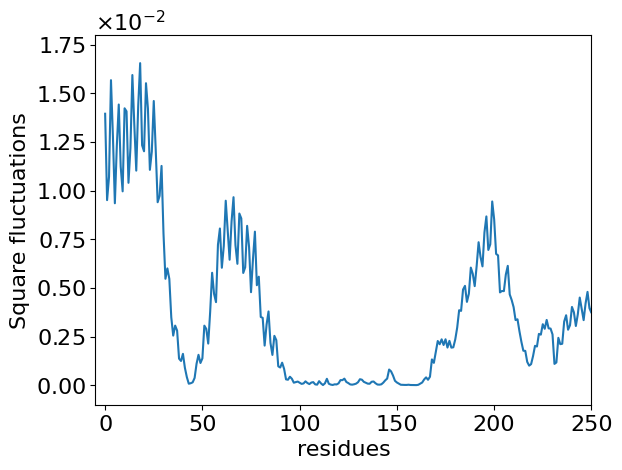

In [55]:
plt.plot(fluc_memb7[:256])
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
ax = plt.gca()
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)  
formatter.set_powerlimits((-2, 2))  
ax.yaxis.set_major_formatter(formatter)
plt.ylim(-0.001,0.018)
plt.xlim(-5,250)
plt.ylabel('Square fluctuations', fontsize=16)
plt.xlabel('residues', fontsize=16)
plt.savefig('nm2_big.svg', dpi=600, bbox_inches='tight' )

These are the squared fluctuations of the first normal mode for the first monomer with a more dense membrane 